In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = './recordingSpecAugment'
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backgroundNoise', 'ㄏㄧㄡ', 'ㄟ', '他', '你', '吼', '啦', '嗯', '好', '我', '的', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [3]:
# Settings
feature_sets_path = './npz/'
feature_sets_filename = 'recordingSpecAugment.npz'
model_filename = './h5/recordingSpecAugment.h5'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[16.  8.  3. ...  6. 16. 14.]
[ 6. 10. 13. ... 12.  1. 14.]
[ 0. 17.  3. ... 15.  4. 13.]


In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(6828, 13, 49)
(2276, 13, 49)
(2276, 13, 49)


In [7]:
# Peek at labels
print(y_val)

[ 0. 17.  3. ... 15.  4. 13.]


In [8]:
# Peek at labels after conversion
print(y_test)

[16.  8.  3. ...  6. 16. 14.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(6828, 13, 49)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(6828, 13, 49, 1)
(2276, 13, 49, 1)
(2276, 13, 49, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(13, 49, 1)


In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Dropout(0.2))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(18, activation='softmax'))
# Display model
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 12, 48, 32)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 24, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 23, 64)         8256      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 11, 64)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 10, 128)        32896     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 10, 128)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 10, 128)       

In [24]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [25]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=100,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Epoch 1/100
137/137 [==============================] - 2s 12ms/step - loss: 2.9244 - acc: 0.1283 - val_loss: 2.4821 - val_acc: 0.2315
Epoch 2/100
137/137 [==============================] - 1s 10ms/step - loss: 2.2209 - acc: 0.3024 - val_loss: 1.6446 - val_acc: 0.4934
Epoch 3/100
137/137 [==============================] - 1s 10ms/step - loss: 1.6251 - acc: 0.4770 - val_loss: 1.2118 - val_acc: 0.6388
Epoch 4/100
137/137 [==============================] - 1s 10ms/step - loss: 1.2946 - acc: 0.5791 - val_loss: 0.9467 - val_acc: 0.7012
Epoch 5/100
137/137 [==============================] - 1s 10ms/step - loss: 1.0880 - acc: 0.6500 - val_loss: 0.9078 - val_acc: 0.7047
Epoch 6/100
137/137 [==============================] - 1s 10ms/step - loss: 0.9634 - acc: 0.6848 - val_loss: 0.7550 - val_acc: 0.7720
Epoch 7/100
137/137 [==============================] - 1s 11ms/step - loss: 0.8473 - acc: 0.7222 - val_loss: 0.6448 - val_acc: 0.7869
Epoch 8/100
137/137 [==============================] - 1s 11ms

Epoch 62/100
137/137 [==============================] - 1s 10ms/step - loss: 0.1599 - acc: 0.9476 - val_loss: 0.4619 - val_acc: 0.8932
Epoch 63/100
137/137 [==============================] - 1s 10ms/step - loss: 0.1553 - acc: 0.9511 - val_loss: 0.4297 - val_acc: 0.8954
Epoch 64/100
137/137 [==============================] - 1s 10ms/step - loss: 0.1667 - acc: 0.9454 - val_loss: 0.4075 - val_acc: 0.8959
Epoch 65/100
137/137 [==============================] - 1s 10ms/step - loss: 0.1520 - acc: 0.9509 - val_loss: 0.4889 - val_acc: 0.8796
Epoch 66/100
137/137 [==============================] - 1s 11ms/step - loss: 0.1230 - acc: 0.9577 - val_loss: 0.4380 - val_acc: 0.9047
Epoch 67/100
137/137 [==============================] - 1s 10ms/step - loss: 0.1243 - acc: 0.9586 - val_loss: 0.3978 - val_acc: 0.9029
Epoch 68/100
137/137 [==============================] - 1s 10ms/step - loss: 0.0946 - acc: 0.9679 - val_loss: 0.5059 - val_acc: 0.9007
Epoch 69/100
137/137 [==============================] -

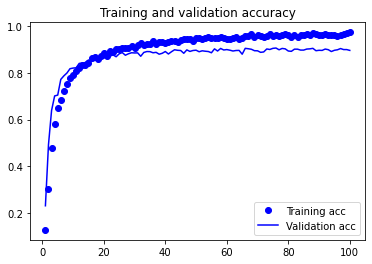

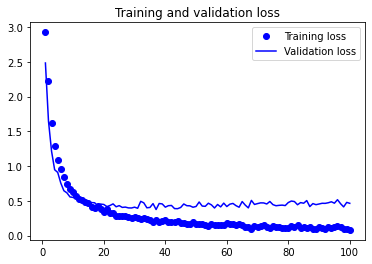

In [26]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
# Save the model as a file
models.save_model(model, model_filename)

In [28]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 16.0  Prediction: [[6.0528191e-15 4.2166422e-16 7.1419703e-11 1.4549108e-16 3.9484598e-19
  2.1230473e-14 2.2729308e-15 2.1588634e-10 6.4832199e-19 3.8361886e-18
  1.7608111e-09 1.9608589e-03 5.9264585e-06 6.2285846e-01 8.8701997e-12
  5.4745883e-16 3.7517470e-01 1.7730596e-15]]
Answer: 8.0  Prediction: [[8.2925102e-14 3.5053377e-12 1.7144312e-07 3.5674712e-09 2.3940750e-11
  2.2663897e-02 2.4301199e-12 4.2119250e-10 9.7733593e-01 2.9144548e-11
  3.8433345e-10 2.4734971e-16 2.3333403e-19 1.8389988e-20 3.1183753e-10
  4.3424475e-16 5.4442480e-13 1.8221209e-09]]
Answer: 3.0  Prediction: [[2.0421210e-11 3.1675215e-16 1.2827767e-11 9.9993861e-01 4.0647255e-17
  5.1636697e-14 3.7922863e-08 1.1317475e-09 3.8204617e-12 4.4416041e-16
  1.0411670e-11 7.2555109e-23 1.7509854e-18 9.4010154e-15 1.2298061e-13
  5.4246804e-05 2.1327325e-11 7.1015579e-06]]
Answer: 4.0  Prediction: [[2.9043165e-12 4.1865681e-22 2.2631416e-03 4.6977345e-24 9.9773669e-01
  2.4037886e-20 2.2546774e-31 1.7577386e-

In [29]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

72/72 [==============================] - 1s 5ms/step - loss: 0.4496 - acc: 0.9104


[0.4495775103569031, 0.9103690981864929]